# Project Title 

## Part 1. Quantitative Analysis of the Industry Sector

### A. Industry Sector Selection and Data Filtering

1. The industry sector that our group chose is "56 Apparel And Accessory Stores". 

In [1]:
# 2. Filtering data
# import public firm data
import pandas as pd

firms = pd.read_csv("data/public_firms.csv")
firms.head()

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
0,1004,1994,USA,AAR CORP,1988/01/01,5080,13.375,22.487,10.463,425.814,451.395,0.024572
1,1004,1995,USA,AAR CORP,1988/01/01,5080,22.000,33.606,16.012,437.846,504.990,0.036570
2,1004,1996,USA,AAR CORP,1988/01/01,5080,30.250,51.705,23.025,529.584,589.328,0.043478
3,1004,1997,USA,AAR CORP,1988/01/01,5080,38.750,17.222,35.657,670.559,782.123,0.053175
4,1004,1998,USA,AAR CORP,1988/01/01,5080,23.875,8.250,41.671,726.630,918.036,0.057348


2. Next, filter the data in "data/public_firms.csv" to only include the firms belonging to the industry sector(s) you have selected. 

In [2]:
# Filtering firms belonging to the "Apparel And Accessory Stores" industry sector 
# (major_group = 56)

# Major group 56 corresponds to SIC codes starting with 56
filtered = firms[(firms["sic"] >= 5600) & (firms["sic"] < 5700)].copy()

# Display number of rows after filtering and show first few rows
print("Number of rows after filtering:", len(filtered))
filtered.head()


Number of rows after filtering: 1367


,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
5923,2484,1995,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,10.2500,14.520,14.866,735.269,1584.942,0.020218
5924,2484,1996,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,13.0000,73.560,29.013,704.731,1591.964,0.041169
5925,2484,1997,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,16.4370,157.394,56.515,775.077,1758.368,0.072915
5926,2484,1998,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,16.3125,106.952,47.783,941.635,1988.513,0.050745
5927,2484,1999,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,13.8750,127.818,61.120,1046.047,2198.696,0.058429


3.	Now, answer the following questions based on the filtered dataset: 
    1. How many unique firm-year ("fyear") observations are there in the filtered dataset?
    2. How many unique firms are there in the filtered dataset?
    3. How many firms in the filtered dataset have records over all 27 years (1994-2020)?

In [3]:
# 3. Questions based on filtered dataset

# a. unique firm-year observations
# Each row is one firm (gvkey) in one year (fyear).
# drop_duplicates() is used on [gvkey, fyear] to make sure that if a firm-year appears more than once in the dataset, it is only counted once.
n_firmyear = filtered[["gvkey", "fyear"]].drop_duplicates().shape[0]
print("a) Unique firm-year observations:", n_firmyear)

# b. unique firms (using gvkey)
unique_firms = filtered["gvkey"].nunique()
print("b) Unique firm observations:", unique_firms)

# c. firms that have records for all 27 years (1994–2020)
# count how many distinct years each firm appears in
full_period_firms = (filtered.groupby("gvkey")["fyear"].nunique())   
full_period_firms = (full_period_firms == 27).sum()  # count how many == 27 (ie. how many in all years)
print("c) Number of firms with records for all 27 years:", full_period_firms)

a) Unique firm-year observations: 1367
b) Unique firm observations: 105
c) Number of firms with records for all 27 years: 11


### B. Preliminary Analysis
1.	What are the top 10 firms with the highest stock price (column "prcc_c") in the year 2020?

In [4]:
# firms in year 2020
firms_2020 = filtered[filtered["fyear"] == 2020]
# top 10 firms in 2020 by stock price
top_10_2020 = firms_2020.sort_values(by="prcc_c", ascending=False).head(10)
print("Top 10 firms in 2020 by stock price:")
top_10_2020

Top 10 firms in 2020 by stock price:


,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
68733,18675,2020,USA,BURLINGTON STORES INC,2013/10/02,5600,261.55,1380.276,-216.499,6781.092,5763.980,-0.031927
33774,9248,2020,USA,ROSS STORES INC,NaN,5651,122.81,4819.293,85.382,12717.867,12531.565,0.006714
43543,11672,2020,USA,TJX COS INC (THE),NaN,5651,68.29,10469.570,90.470,30813.555,32136.962,0.002936
141569,65430,2020,USA,CHILDRENS PLACE INC,1997/09/19,5600,50.10,63.548,-140.365,1140.127,1522.598,-0.123113
184708,163051,2020,USA,CITI TRENDS INC,2005/05/18,5651,49.68,123.177,23.978,494.593,783.294,0.048480
76291,21898,2020,USA,BOOT BARN HOLDINGS INC,2014/10/30,5661,43.36,73.148,59.386,933.581,893.491,0.063611
43244,11584,2020,USA,FOOT LOCKER INC,NaN,5661,40.44,1680.000,323.000,7043.000,7548.000,0.045861
94181,27938,2020,USA,SHOE CARNIVAL INC,1993/03/16,5661,39.18,106.532,15.991,642.747,976.765,0.024879
23067,6733,2020,USA,BATH & BODY WORKS INC,NaN,5600,37.19,3903.000,844.000,11571.000,11847.000,0.072941
184613,162988,2020,USA,ZUMIEZ INC,2005/05/06,5651,36.78,73.622,76.227,998.364,990.652,0.076352


2.	What are the top 10 firms with the highest sales (column "sale") in the entire history of the dataset?

In [5]:
# sales of firms in the entire history
total_sales = filtered.groupby(["gvkey", "conm"])["sale"].sum().reset_index()
total_sales.rename(columns={"sale": "total_sales"}, inplace=True)
# total_sales is a dataframe with gvkey, conm, and total_sales columns
top_10_sales = total_sales.sort_values(by="total_sales", ascending=False).head(10)
print("Top 10 firms by total sales over the entire history:")
top_10_sales


Top 10 firms by total sales over the entire history:


,gvkey,conm,total_sales
23,11672,TJX COS INC (THE),531354.915
11,4990,GAP INC,362527.300
14,6733,BATH & BODY WORKS INC,274942.175
16,7922,NORDSTROM INC,248159.506
19,9248,ROSS STORES INC,188529.105
22,11584,FOOT LOCKER INC,167706.000
72,63643,ABERCROMBIE & FITCH -CL A,67874.646
7,4072,ASCENA RETAIL GROUP INC,65366.513
61,30059,AMERN EAGLE OUTFITTERS INC,63138.850
41,24171,DESIGNER BRANDS INC,57096.129


3.	What is the geographical distribution (column "location") of all the firms? In other words, how many firms are there in each location? Please list the top 10 locations. 

In [6]:
# group by location
firms_by_location = filtered.groupby("location")["gvkey"].nunique().reset_index()
firms_by_location.rename(columns={"gvkey": "num_firms"}, inplace=True)
# sort by number of firms in descending order
firms_by_location = firms_by_location.sort_values(by="num_firms", ascending=False).head(10)
print("Number of firms by location (top 10):")
firms_by_location

Number of firms by location (top 10):


,location,num_firms
1,USA,104
0,CAN,1


4. Create a line chart to show the average stock price (column "prcc_c") in the selected sector(s) across the years.

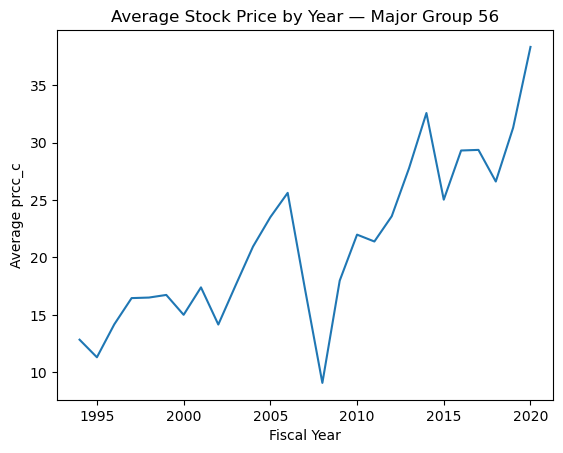

In [14]:
import matplotlib.pyplot as plt

avg_price_by_year = (filtered
                     .groupby("fyear", as_index=False)["prcc_c"]
                     .mean())

plt.plot(avg_price_by_year["fyear"], avg_price_by_year["prcc_c"])  
plt.title("Average Stock Price by Year — Major Group 56")
plt.xlabel("Fiscal Year")
plt.ylabel("Average prcc_c")
plt.show()   


5. Which firm was affected the most by the 2008 Financial Crisis, as measured by the percentage drop in stock price from 2007 to 2008?

In [16]:
# 1) avg price per firm-year in 2007 & 2008
avg = (filtered[ filtered["fyear"].isin([2007, 2008]) ]
         .groupby(["gvkey","conm","fyear"])["prcc_c"].mean().reset_index())

# 2) split and rename
prices_2007 = avg[avg["fyear"]==2007][["gvkey","conm","prcc_c"]]
prices_2007.columns=["gvkey","conm","p2007"]

prices_2008 = avg[avg["fyear"]==2008][["gvkey","conm","prcc_c"]]
prices_2008.columns=["gvkey","conm","p2008"]

# 3) merge & compute change (negative = drop)
merged_prices = prices_2007.merge(prices_2008, on=["gvkey","conm"])
merged_prices["percent_change_2007_to_2008"] = (merged_prices["p2008"] - merged_prices["p2007"]) / merged_prices["p2007"]

# 4) largest drop = most negative change
result = merged_prices.sort_values("percent_change_2007_to_2008").head(1)[
    ["conm","p2007","p2008","percent_change_2007_to_2008"]
]

print(result)


                        conm  p2007  p2008  percent_change_2007_to_2008
44  EDDIE BAUER HOLDINGS INC   6.35   0.51                    -0.919685


6. Plot the average Return on Assets (ROA) for the firms located in the “USA” across the years. ROA is calculated as ni/asset.

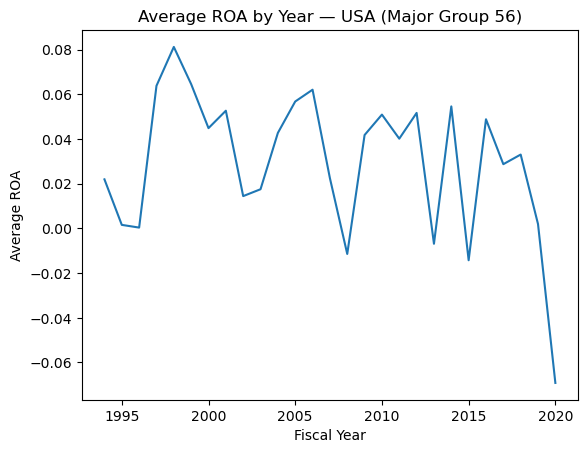

In [15]:
# Average ROA by year for USA firms (ROA = ni / asset)

usa = filtered[ filtered["location"] == "USA" ]
usa = usa[ usa["asset"] > 0 ]          
usa["roa"] = usa["ni"] / usa["asset"]

roa_by_year = usa.groupby("fyear")["roa"].mean().reset_index()

plt.plot(roa_by_year["fyear"], roa_by_year["roa"])
plt.title("Average ROA by Year — USA (Major Group 56)")
plt.xlabel("Fiscal Year")
plt.ylabel("Average ROA")
plt.show()